In [2]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')

In [149]:
data = pd.read_csv("data/Elypsis/8 norm.csv").set_index("index")

In [150]:
data = data[data["intencion_presidencial"].notnull()]
data.loc[(data.intencion_presidencial != "AF-CFK") & (data.intencion_presidencial != "MM-MP"), "intencion_presidencial"] = "Others"
data.loc[data.intencion_presidencial=="MM-MP", "intencion_presidencial"] = "MP"
data.loc[data.intencion_presidencial=="AF-CFK", "intencion_presidencial"] = "FF"

data.loc[data["Edad "]=="Entre 16 y 30", "Edad "] = ">16, <=30"
data.loc[data["Edad "]=="entre 31 y 50", "Edad "] = ">30, <=50"
data.loc[data["Edad "]=="entre 51 y 65", "Edad "] = ">51, <=65"
data.loc[data["Edad "]=="Mas de 65 años", "Edad "] = ">65"

data.loc[data["Usted es "]=="Hombre", "Usted es "] = "Male"
data.loc[data["Usted es "]=="Mujer", "Usted es "] = "Female"

In [151]:
data.intencion_presidencial.value_counts()

MP        1652
FF        1176
Others     575
Name: intencion_presidencial, dtype: int64

In [152]:
data[data.intencion_presidencial=="MP"].pondera_base.sum(), data[data.intencion_presidencial=="FF"].pondera_base.sum(), data[data.intencion_presidencial=="Others"].pondera_base.sum()

(926.7995289568833, 898.5986409908451, 493.88755244562805)

In [153]:
926.79 / (926.79 + 898.59 + 493.88), 898.59 / (926.79 + 898.59 + 493.88), 493.88 / (926.79 + 898.59 + 493.88)

(0.39960590878124913, 0.38744685804955026, 0.2129472331692005)

In [124]:
data["Edad "].value_counts()

>51, <=65    1528
>30, <=50    1069
>65           532
>16, <=30     274
Name: Edad , dtype: int64

In [125]:
data["Usted es "].value_counts()

Female    2132
Male      1271
Name: Usted es , dtype: int64

In [126]:
groups = data.groupby(["Edad ", "Usted es ", "intencion_presidencial"]).size()

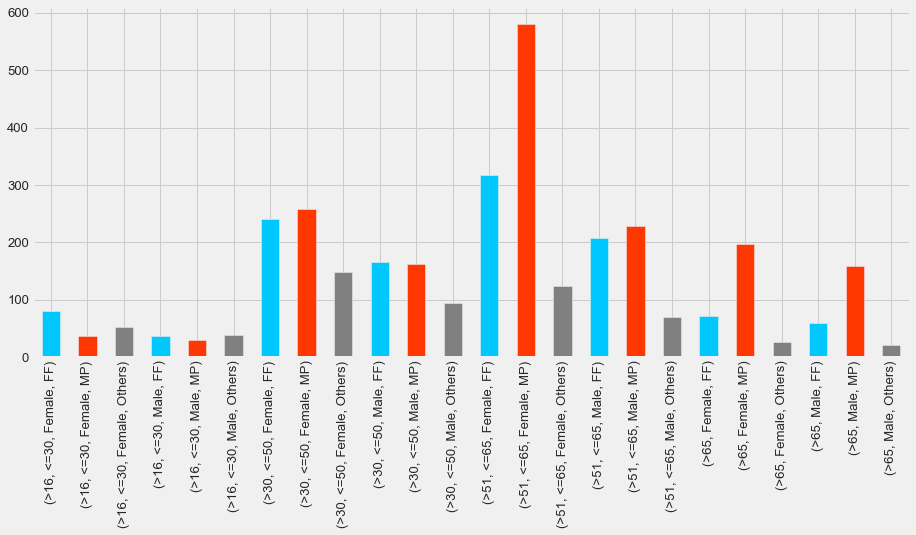

In [127]:
Kc = "#00c8ff";
Mc = "#ff3700";
sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 6))
groups.plot.bar(color=[Kc, Mc, "grey"])
plt.xlabel("")
plt.savefig("web/static/different_users_Elypsis.png", bbox_inches = 'tight', dpi=300)

In [106]:
"""
From census
female 15-29    0.167
female 30-49    0.176
female 50-64    0.097
female >=65     0.081

male 15-29      0.167
male 30-49      0.168
male 50-64      0.088
male >=65       0.056
"""
print("After reweighting!")
+ groups[">16, <=30"]["Female"]["FF"] / sum(groups[">16, <=30"]["Female"]) * 0.167 \
+ groups[">16, <=30"]["Male"]["FF"] / sum(groups[">16, <=30"]["Male"]) * 0.167 \
+ groups[">30, <=50"]["Female"]["FF"] / sum(groups[">30, <=50"]["Female"]) * 0.176 \
+ groups[">30, <=50"]["Male"]["FF"] / sum(groups[">30, <=50"]["Male"]) * 0.168 \
+ groups[">51, <=65"]["Female"]["FF"] / sum(groups[">51, <=65"]["Female"]) * 0.097 \
+ groups[">51, <=65"]["Male"]["FF"] / sum(groups[">51, <=65"]["Male"]) * 0.088 \
+ groups[">65"]["Female"]["FF"] / sum(groups[">65"]["Female"]) * 0.081 \
+ groups[">65"]["Male"]["FF"] / sum(groups[">65"]["Male"]) * 0.056 \

After reweighting!


0.353360946706829

In [107]:
+ groups[">16, <=30"]["Female"]["MP"] / sum(groups[">16, <=30"]["Female"]) * 0.167 \
+ groups[">16, <=30"]["Male"]["MP"] / sum(groups[">16, <=30"]["Male"]) * 0.167 \
+ groups[">30, <=50"]["Female"]["MP"] / sum(groups[">30, <=50"]["Female"]) * 0.176 \
+ groups[">30, <=50"]["Male"]["MP"] / sum(groups[">30, <=50"]["Male"]) * 0.168 \
+ groups[">51, <=65"]["Female"]["MP"] / sum(groups[">51, <=65"]["Female"]) * 0.097 \
+ groups[">51, <=65"]["Male"]["MP"] / sum(groups[">51, <=65"]["Male"]) * 0.088 \
+ groups[">65"]["Female"]["MP"] / sum(groups[">65"]["Female"]) * 0.081 \
+ groups[">65"]["Male"]["MP"] / sum(groups[">65"]["Male"]) * 0.056 \

0.39106578382228896

In [108]:
+ groups[">16, <=30"]["Female"]["Others"] / sum(groups[">16, <=30"]["Female"]) * 0.167 \
+ groups[">16, <=30"]["Male"]["Others"] / sum(groups[">16, <=30"]["Male"]) * 0.167 \
+ groups[">30, <=50"]["Female"]["Others"] / sum(groups[">30, <=50"]["Female"]) * 0.176 \
+ groups[">30, <=50"]["Male"]["Others"] / sum(groups[">30, <=50"]["Male"]) * 0.168 \
+ groups[">51, <=65"]["Female"]["Others"] / sum(groups[">51, <=65"]["Female"]) * 0.097 \
+ groups[">51, <=65"]["Male"]["Others"] / sum(groups[">51, <=65"]["Male"]) * 0.088 \
+ groups[">65"]["Female"]["Others"] / sum(groups[">65"]["Female"]) * 0.081 \
+ groups[">65"]["Male"]["Others"] / sum(groups[">65"]["Male"]) * 0.056 \

0.25557326947088216

In [128]:
groups = data.groupby(["Edad ", "Usted es "]).size()
groups

Edad       Usted es 
>16, <=30  Female        169
           Male          105
>30, <=50  Female        647
           Male          422
>51, <=65  Female       1022
           Male          506
>65        Female        294
           Male          238
dtype: int64

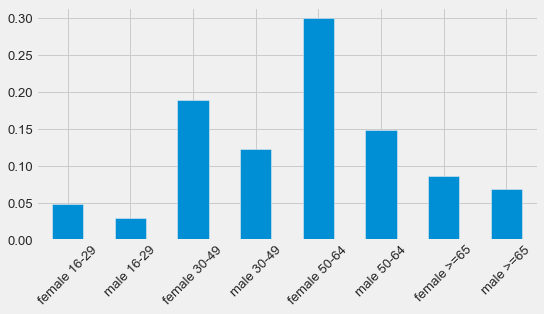

In [129]:
cen = {
    "category": ["female 16-29", "male 16-29", 
                 "female 30-49", "male 30-49", 
                 "female 50-64", "male 50-64", 
                 "female >=65", "male >=65", ],
    "n": [
          groups[">16, <=30"]["Female"], groups[">16, <=30"]["Male"],
          groups[">30, <=50"]["Female"], groups[">30, <=50"]["Male"],
          groups[">51, <=65"]["Female"], groups[">51, <=65"]["Male"], 
          groups[">65"]["Female"], groups[">65"]["Male"] 
        ]
}
cen = pd.DataFrame(cen).set_index("category")
cen["percent"] = cen / cen.sum()
plt.figure(figsize=(8, 4))
cen["percent"].plot.bar()
plt.xticks(rotation=45)
plt.xlabel("")
plt.savefig("web/static/population_Elypsis.png", dpi=300, bbox_inches = 'tight')
# plt.title("Distribution of population from Census")

# Post PASO

In [131]:
data = pd.read_csv("data/Elypsis/Post PASO - 8 norm.csv").set_index("index")
len(data)

3154

In [132]:
data = data[data["intencion_presidencial"].notnull()]
data.loc[(data.intencion_presidencial != "AF-CFK") & (data.intencion_presidencial != "MM-MP"), "intencion_presidencial"] = "Others"
data.loc[data.intencion_presidencial=="MM-MP", "intencion_presidencial"] = "MP"
data.loc[data.intencion_presidencial=="AF-CFK", "intencion_presidencial"] = "FF"
len(data)

2963

In [142]:
data[data.intencion_presidencial=="MP"].pondera_base.sum(), data[data.intencion_presidencial=="FF"].pondera_base.sum(), data[data.intencion_presidencial=="Others"].pondera_base.sum()

(772.358679482, 873.964104329, 386.008595378)

In [143]:
873.96 / (873.96 + 772.35 + 386.00), 772.35 / (873.96 + 772.35 + 386.00), 386.00 / (873.96 + 772.35 + 386.00)

(0.43003281979619257, 0.3800355260762384, 0.18993165412756913)

In [114]:
data.loc[data["Edad "]=="Entre 16 y 30", "Edad "] = ">16, <=30"
data.loc[data["Edad "]=="entre 31 y 50", "Edad "] = ">30, <=50"
data.loc[data["Edad "]=="entre 51 y 65", "Edad "] = ">51, <=65"
data.loc[data["Edad "]=="Mas de 65 años", "Edad "] = ">65"

data.loc[data["Usted es "]=="Hombre", "Usted es "] = "Male"
data.loc[data["Usted es "]=="Mujer", "Usted es "] = "Female"

In [115]:
data.intencion_presidencial.value_counts()

MP        1224
FF        1203
Others     536
Name: intencion_presidencial, dtype: int64

In [117]:
groups = data.groupby(["Edad ", "Usted es ", "intencion_presidencial"]).size()
groups

Edad       Usted es   intencion_presidencial
>16, <=30  Female     FF                        223
                      MP                        135
                      Others                    156
           Male       FF                         59
                      MP                         40
                      Others                     32
>30, <=50  Female     FF                        296
                      MP                        238
                      Others                    181
           Male       FF                        128
                      MP                        119
                      Others                     37
>51, <=65  Female     FF                        223
                      MP                        339
                      Others                     75
           Male       FF                        151
                      MP                        146
                      Others                     31
>65        Female  

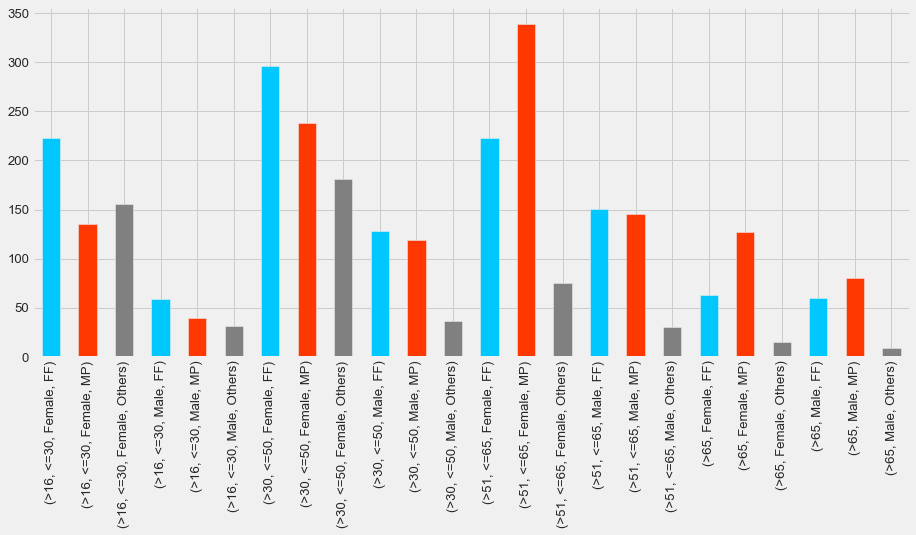

In [119]:
Kc = "#00c8ff";
Mc = "#ff3700";
sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 6))
groups.plot.bar(color=[Kc, Mc, "grey"])
plt.xlabel("")
plt.savefig("web/static/different_users_Elypsis_post_PASO.png", bbox_inches = 'tight', dpi=300)

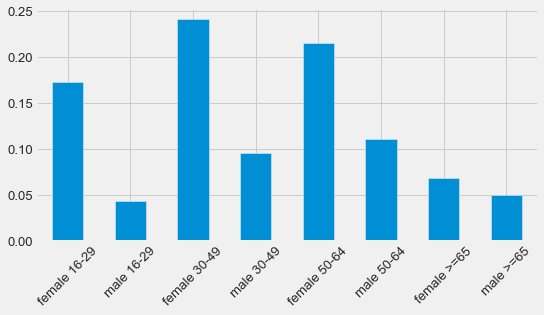

In [120]:
groups = data.groupby(["Edad ", "Usted es "]).size()
cen = {
    "category": ["female 16-29", "male 16-29", 
                 "female 30-49", "male 30-49", 
                 "female 50-64", "male 50-64", 
                 "female >=65", "male >=65", ],
    "n": [
          groups[">16, <=30"]["Female"], groups[">16, <=30"]["Male"],
          groups[">30, <=50"]["Female"], groups[">30, <=50"]["Male"],
          groups[">51, <=65"]["Female"], groups[">51, <=65"]["Male"], 
          groups[">65"]["Female"], groups[">65"]["Male"] 
        ]
}
cen = pd.DataFrame(cen).set_index("category")
cen["percent"] = cen / cen.sum()
plt.figure(figsize=(8, 4))
cen["percent"].plot.bar()
plt.xticks(rotation=45)
plt.xlabel("")
plt.savefig("web/static/population_Elypsis_post_PASO.png", dpi=300, bbox_inches = 'tight')
# plt.title("Distribution of population from Census")

In [87]:
data = pd.read_csv("data/Elypsis/Facebook Encuesta Agosto 2019 - Post Paso - normalization.csv").set_index("index")

In [88]:
data.loc[(data.intencion_presidencial != "AF-CFK") & (data.intencion_presidencial != "MM-MP"), "intencion_presidencial"] = "Others"
data.loc[data.intencion_presidencial=="MM-MP", "intencion_presidencial"] = "MP"
data.loc[data.intencion_presidencial=="AF-CFK", "intencion_presidencial"] = "FF"

data.loc[data["Edad "]=="Entre 16 y 30", "Edad "] = ">16, <=30"
data.loc[data["Edad "]=="entre 31 y 50", "Edad "] = ">30, <=50"
data.loc[data["Edad "]=="entre 51 y 65", "Edad "] = ">51, <=65"
data.loc[data["Edad "]=="Mas de 65 años", "Edad "] = ">65"

data.loc[data["Usted es "]=="Hombre", "Usted es "] = "Male"
data.loc[data["Usted es "]=="Mujer", "Usted es "] = "Female"

data.intencion_presidencial.value_counts()

MP        1224
FF        1203
Others     727
Name: intencion_presidencial, dtype: int64

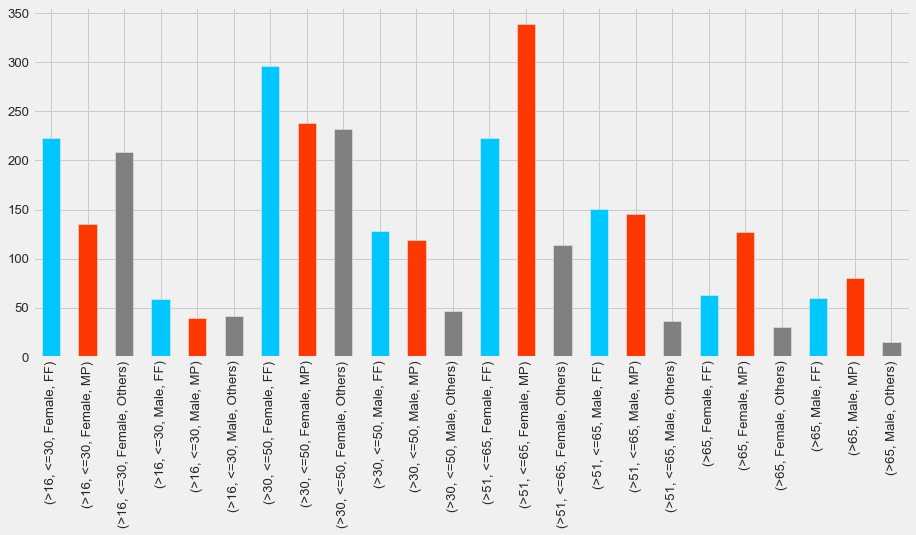

In [90]:
groups = data.groupby(["Edad ", "Usted es ", "intencion_presidencial"]).size()
Kc = "#00c8ff";
Mc = "#ff3700";
sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 6))
groups.plot.bar(color=[Kc, Mc, "grey"])
plt.xlabel("")
plt.savefig("web/static/different_users_Elypsis_post_PASO.png", bbox_inches = 'tight', dpi=300)

In [91]:
"""
From census
female 15-29    0.167
female 30-49    0.176
female 50-64    0.097
female >=65     0.081

male 15-29      0.167
male 30-49      0.168
male 50-64      0.088
male >=65       0.056
"""
print("After reweighting!")
+ groups[">16, <=30"]["Female"]["FF"] / sum(groups[">16, <=30"]["Female"]) * 0.167 \
+ groups[">16, <=30"]["Male"]["FF"] / sum(groups[">16, <=30"]["Male"]) * 0.167 \
+ groups[">30, <=50"]["Female"]["FF"] / sum(groups[">30, <=50"]["Female"]) * 0.176 \
+ groups[">30, <=50"]["Male"]["FF"] / sum(groups[">30, <=50"]["Male"]) * 0.168 \
+ groups[">51, <=65"]["Female"]["FF"] / sum(groups[">51, <=65"]["Female"]) * 0.097 \
+ groups[">51, <=65"]["Male"]["FF"] / sum(groups[">51, <=65"]["Male"]) * 0.088 \
+ groups[">65"]["Female"]["FF"] / sum(groups[">65"]["Female"]) * 0.081 \
+ groups[">65"]["Male"]["FF"] / sum(groups[">65"]["Male"]) * 0.056 \

After reweighting!


0.3932643785854887

In [92]:
+ groups[">16, <=30"]["Female"]["MP"] / sum(groups[">16, <=30"]["Female"]) * 0.167 \
+ groups[">16, <=30"]["Male"]["MP"] / sum(groups[">16, <=30"]["Male"]) * 0.167 \
+ groups[">30, <=50"]["Female"]["MP"] / sum(groups[">30, <=50"]["Female"]) * 0.176 \
+ groups[">30, <=50"]["Male"]["MP"] / sum(groups[">30, <=50"]["Male"]) * 0.168 \
+ groups[">51, <=65"]["Female"]["MP"] / sum(groups[">51, <=65"]["Female"]) * 0.097 \
+ groups[">51, <=65"]["Male"]["MP"] / sum(groups[">51, <=65"]["Male"]) * 0.088 \
+ groups[">65"]["Female"]["MP"] / sum(groups[">65"]["Female"]) * 0.081 \
+ groups[">65"]["Male"]["MP"] / sum(groups[">65"]["Male"]) * 0.056 \

0.3723831585049697

In [93]:
+ groups[">16, <=30"]["Female"]["Others"] / sum(groups[">16, <=30"]["Female"]) * 0.167 \
+ groups[">16, <=30"]["Male"]["Others"] / sum(groups[">16, <=30"]["Male"]) * 0.167 \
+ groups[">30, <=50"]["Female"]["Others"] / sum(groups[">30, <=50"]["Female"]) * 0.176 \
+ groups[">30, <=50"]["Male"]["Others"] / sum(groups[">30, <=50"]["Male"]) * 0.168 \
+ groups[">51, <=65"]["Female"]["Others"] / sum(groups[">51, <=65"]["Female"]) * 0.097 \
+ groups[">51, <=65"]["Male"]["Others"] / sum(groups[">51, <=65"]["Male"]) * 0.088 \
+ groups[">65"]["Female"]["Others"] / sum(groups[">65"]["Female"]) * 0.081 \
+ groups[">65"]["Male"]["Others"] / sum(groups[">65"]["Male"]) * 0.056 \

0.2343524629095416

In [95]:
groups = data.groupby(["Edad ", "Usted es "]).size()
groups

Edad       Usted es 
>16, <=30  Female       567
           Male         141
>30, <=50  Female       766
           Male         294
>51, <=65  Female       676
           Male         334
>65        Female       221
           Male         155
dtype: int64

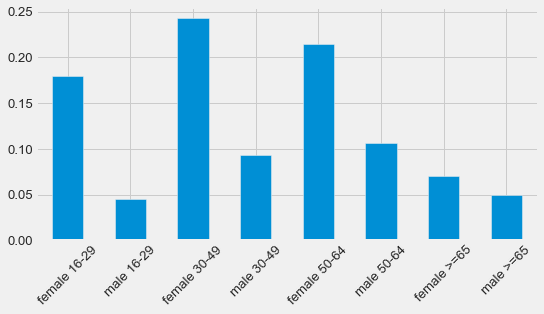

In [96]:
cen = {
    "category": ["female 16-29", "male 16-29", 
                 "female 30-49", "male 30-49", 
                 "female 50-64", "male 50-64", 
                 "female >=65", "male >=65", ],
    "n": [
          groups[">16, <=30"]["Female"], groups[">16, <=30"]["Male"],
          groups[">30, <=50"]["Female"], groups[">30, <=50"]["Male"],
          groups[">51, <=65"]["Female"], groups[">51, <=65"]["Male"], 
          groups[">65"]["Female"], groups[">65"]["Male"] 
        ]
}
cen = pd.DataFrame(cen).set_index("category")
cen["percent"] = cen / cen.sum()
plt.figure(figsize=(8, 4))
cen["percent"].plot.bar()
plt.xticks(rotation=45)
plt.xlabel("")
plt.savefig("web/static/population_Elypsis_post_PASO.png", dpi=300, bbox_inches = 'tight')
# plt.title("Distribution of population from Census")